In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep.csv


In [ ]:
data = pd.read_csv('HR_comma_sep.csv')

In [ ]:
data.info()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86       

In [ ]:
label_encoder = LabelEncoder()
data['salary'] = label_encoder.fit_transform(data['salary'])
data['Department'] = label_encoder.fit_transform(data['Department'])

In [ ]:
# Verify data types after encoding
print("\nData Types After Encoding:\n", data.dtypes)


Data Types After Encoding:
 satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                 int64
salary                     int64
dtype: object


In [ ]:
# Step 1: Exploratory Data Analysis (EDA)
# Correlation matrix to find relevant features impacting employee retention
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
print("\nCorrelation Matrix:\n", correlation_matrix)




Correlation Matrix:
                        satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   
Department                       0.003153         0.007772        0.009268   
salary                           0.011754         0.013965        0.009672   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048         

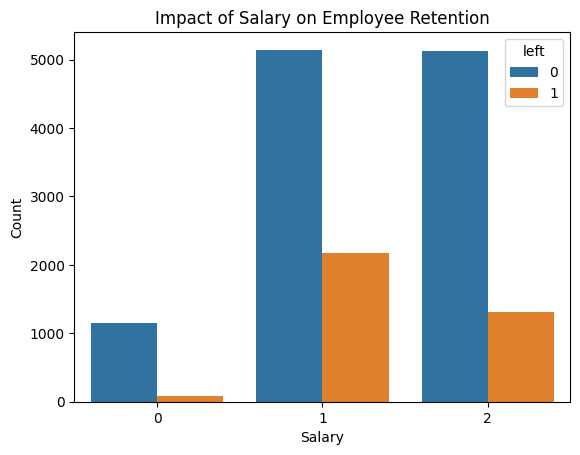

In [ ]:
# Step 2: Plot bar chart for the impact of 'salary' on 'left'
sns.countplot(x='salary', hue='left', data=data)
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()


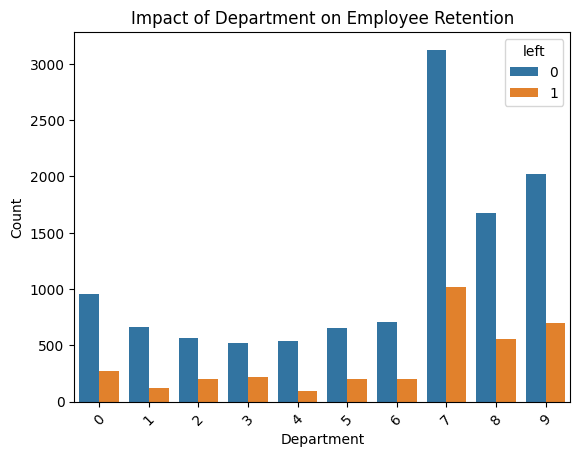

In [ ]:
# Step 3: Plot bar chart for the correlation between 'Department' and 'left'
sns.countplot(x='Department', hue='left', data=data)
plt.title('Impact of Department on Employee Retention')
plt.xticks(rotation=45)
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()


In [ ]:
loop# Step 4: Logistic Regression Model
# Selecting relevant features based on EDA
X = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary', 'Department']]
y = data['left']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize and train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Step 5: Measure accuracy
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


Model Accuracy: 76.04%

Confusion Matrix:
 [[3167  261]
 [ 817  255]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85      3428
           1       0.49      0.24      0.32      1072

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500

